In [1]:
from functools import partial

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize, scale
import numpy as np
import matplotlib.pyplot as plt
from echoes import ESNRegressor

from bioRNN.tasks.memory.capacity import make_X_y, forgetting

In [2]:
lags = np.arange(1, 16)
X, y = make_X_y(
    make_X=partial(np.random.uniform, low=-.5, high=.5, size=5_000),
    lags=lags,
    cut=0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 1), (1000, 1), (4000, 15), (1000, 15))

In [3]:
# Make artificial connectome
shape = (100, 100)
W = np.random.lognormal(size=shape)

In [4]:
n_transient = 100
y_pred = (ESNRegressor(W=W,
                       n_transient=n_transient, 
                       spectral_radius=.99,
                       input_scaling=.01,)
          .fit(X_train, y_train)
          .predict(X_test))

forget_curve, memory_capacity = forgetting(y_test[n_transient:], y_pred[n_transient:])

5.065351290538669


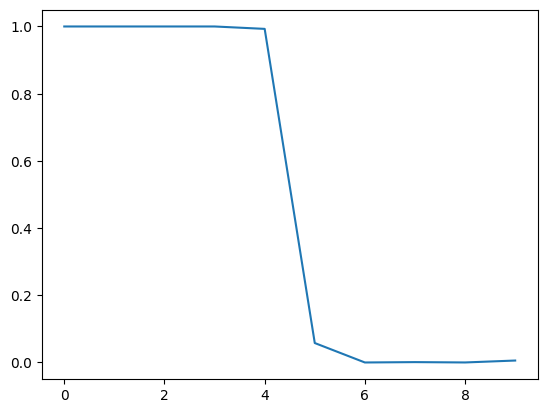

In [5]:
plt.plot(forget_curve[:10])
print(memory_capacity)